In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "C:/Users/New User/Desktop/PREWORK_SJT/Module-5/05-Matplotlib HW/Instructions/Pyber/data/city_data.csv"
ride_data_to_load = "C:/Users/New User/Desktop/PREWORK_SJT/Module-5/05-Matplotlib HW/Instructions/Pyber/data/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

pyber_data_df = pd.merge(city_data_df, ride_data_df, on="city" )

# Display the data table for preview
pyber_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure
# Show plot

In [5]:
#seperate data by city type
urban_cities = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [9]:
# organize data for final plot
urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

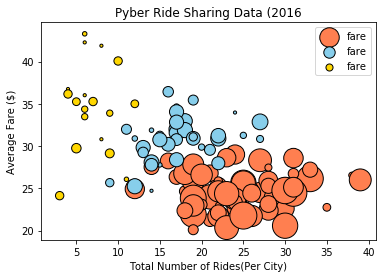

In [34]:
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="black",)
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, edgecolor="black", c="skyblue")
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, edgecolor="black", c="gold")
plt.title("Pyber Ride Sharing Data (2016")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
plt.legend()
plt.show()

## Total Fares by City Type

In [35]:
# Calculate Type Percents
# Build Pie Chart
# Save Figure
# Show Figure

In [52]:
fare_sum = pyber_data_df.groupby("type").sum()["fare"]
fare_percentage = (fare_sum / pyber_data_df["fare"].sum())*100
fare_percentage

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

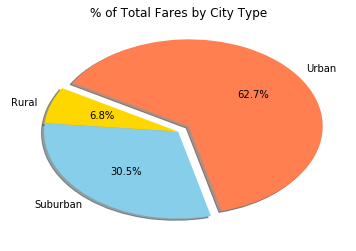

In [70]:
explode=(0, 0, 0.1)
plt.pie(fare_percentage, labels=["Rural", "Suburban", "Urban"], colors=["gold", "skyblue", "coral"], 
        startangle=150, shadow=True, autopct="%1.1f%%", explode=explode)
plt.title("% of Total Fares by City Type")

plt.show()

## Total Rides by City Type

In [38]:
# Calculate Ride Percents
# Build Pie Chart
# Save Figure
# Show Figure

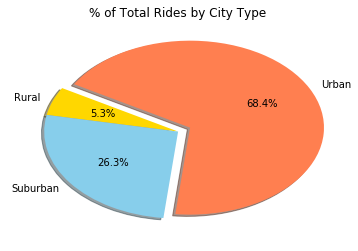

In [68]:
type_ride = pyber_data_df.groupby("type").count()["ride_id"]
ride_percentage = (type_ride / pyber_data_df["ride_id"].count())*100

plt.pie(ride_percentage, labels=["Rural", "Suburban", "Urban"], colors=["gold", "skyblue", "coral"],
       explode=[0, 0, 0.1], autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
plt.show()

## Total Drivers by City Type

In [40]:
# Calculate Driver Percents
# Build Pie Charts
# Save Figure
# Show Figure

In [71]:
type_driver = pyber_data_df.groupby("type").sum()["driver_count"]
driver_percentage = (type_driver / pyber_data_df["driver_count"].sum())*100
driver_percentage

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

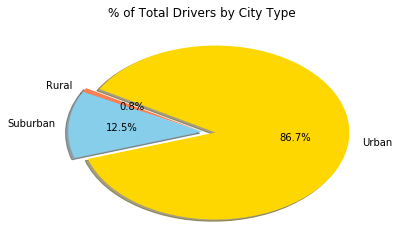

In [74]:
plt.pie(driver_percentage, labels=["Rural", "Suburban", "Urban"], colors=["coral", "skyblue", "gold"],
       explode=[0, 0, 0.1], autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
plt.show()